In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob

from wordcloud import WordCloud
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv('combined_processed-tweets(translated).csv');
display(data)

,Unnamed: 0,index,Processed Tweets
0,0,0,nice onlin class save money ver trsr nct boyz ...
1,1,1,onlin class pend activ
2,2,2,school nasad onlin class hahahaha
3,3,3,guy hard familiar onlin class haha
4,4,4,onlin class fuck sick
...,...,...,...
13514,13514,2244,clr playlist onlin class
13515,13515,2245,onlin class tomorrow bye socm feel send flower...
13516,13516,2265,tbh prefer onlin class situat safe jusko schoo...
13517,13517,2266,putek troubl studi return onlin class rant cou...


In [ ]:
text_data = data.drop(['Unnamed: 0'], axis=1)
display(text_data)

,index,Processed Tweets
0,0,nice onlin class save money ver trsr nct boyz ...
1,1,onlin class pend activ
2,2,school nasad onlin class hahahaha
3,3,guy hard familiar onlin class haha
4,4,onlin class fuck sick
...,...,...
13514,2244,clr playlist onlin class
13515,2245,onlin class tomorrow bye socm feel send flower...
13516,2265,tbh prefer onlin class situat safe jusko schoo...
13517,2266,putek troubl studi return onlin class rant cou...


In [ ]:
def polarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

In [ ]:
text_data['polarity'] = text_data['Processed Tweets'].apply(polarity)
display(text_data)

,index,Processed Tweets,polarity
0,0,nice onlin class save money ver trsr nct boyz ...,0.600000
1,1,onlin class pend activ,0.000000
2,2,school nasad onlin class hahahaha,0.200000
3,3,guy hard familiar onlin class haha,0.094444
4,4,onlin class fuck sick,-0.557143
...,...,...,...
13514,2244,clr playlist onlin class,0.000000
13515,2245,onlin class tomorrow bye socm feel send flower...,0.000000
13516,2265,tbh prefer onlin class situat safe jusko schoo...,-0.107143
13517,2266,putek troubl studi return onlin class rant cou...,0.000000


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
text_data['sentiment'] = text_data['polarity'].apply(sentiment)
display(text_data)

,index,Processed Tweets,polarity,sentiment
0,0,nice onlin class save money ver trsr nct boyz ...,0.600000,Positive
1,1,onlin class pend activ,0.000000,Neutral
2,2,school nasad onlin class hahahaha,0.200000,Positive
3,3,guy hard familiar onlin class haha,0.094444,Positive
4,4,onlin class fuck sick,-0.557143,Negative
...,...,...,...,...
13514,2244,clr playlist onlin class,0.000000,Neutral
13515,2245,onlin class tomorrow bye socm feel send flower...,0.000000,Neutral
13516,2265,tbh prefer onlin class situat safe jusko schoo...,-0.107143,Negative
13517,2266,putek troubl studi return onlin class rant cou...,0.000000,Neutral


[Text(0, 0, '2742'), Text(0, 0, '8660'), Text(0, 0, '2117')]

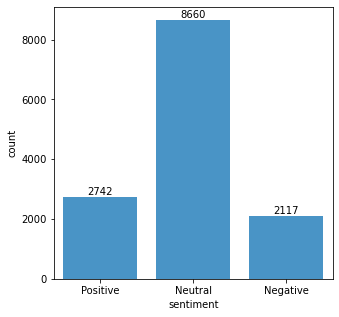

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='sentiment', data = text_data, color = '#3498DB')
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'Distribution of sentiments')

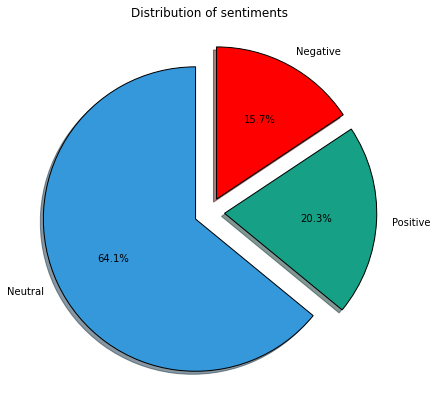

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("#3498DB", "#16A085", "red")
wp = {'linewidth':1, 'edgecolor':"black"}
tags = text_data['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_data[text_data.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,index,Processed Tweets,polarity,sentiment
6775,7929,laptop tabl perfect school kid comfort onlin c...,1.0,Positive
6701,7836,shemay time perfect quiz onlin class,1.0,Positive
8491,9966,hope onlin class attend tire chase perfect att...,1.0,Positive
3218,3651,onlin class reason parent angri hold phone tea...,1.0,Positive
321,341,eam classi plastic chair dine chair cafe chair...,1.0,Positive


In [ ]:
neg_tweets = text_data[text_data.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,index,Processed Tweets,polarity,sentiment
5160,5998,beast special mention onlin class left hahahah...,-0.005952,Negative
2562,2895,dump school onlin class beat normal abus grade...,-0.008333,Negative
7636,8940,implic onlin class futur compli left resourc w...,-0.008333,Negative
6097,7115,class start public school capabl onlin class s...,-0.012500,Negative
7454,8728,onlin class onlin class anti poor educ rich pr...,-0.012500,Negative


In [ ]:
neutral_tweets = text_data[text_data.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,index,Processed Tweets,polarity,sentiment
1,1,onlin class pend activ,0.0,Neutral
8988,10551,western onlin class god compshop,0.0,Neutral
9005,10569,abigog onlin class,0.0,Neutral
9004,10568,nsg student struggl lot onlin class,0.0,Neutral
9003,10567,expect wake morn listen listen onlin class,0.0,Neutral


In [ ]:
def word_cloud(tweets_data, sentiment):
    Tweet = ' '.join([word for word in tweets_data['Processed Tweets']])
    plt.figure(figsize=(20,15), facecolor='None')
    wordcloud = WordCloud(max_words=500, width=1600, height=800, background_color='white').generate(Tweet)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Most frequent words in '+ sentiment +' tweets', fontsize=25)
    plt.show()

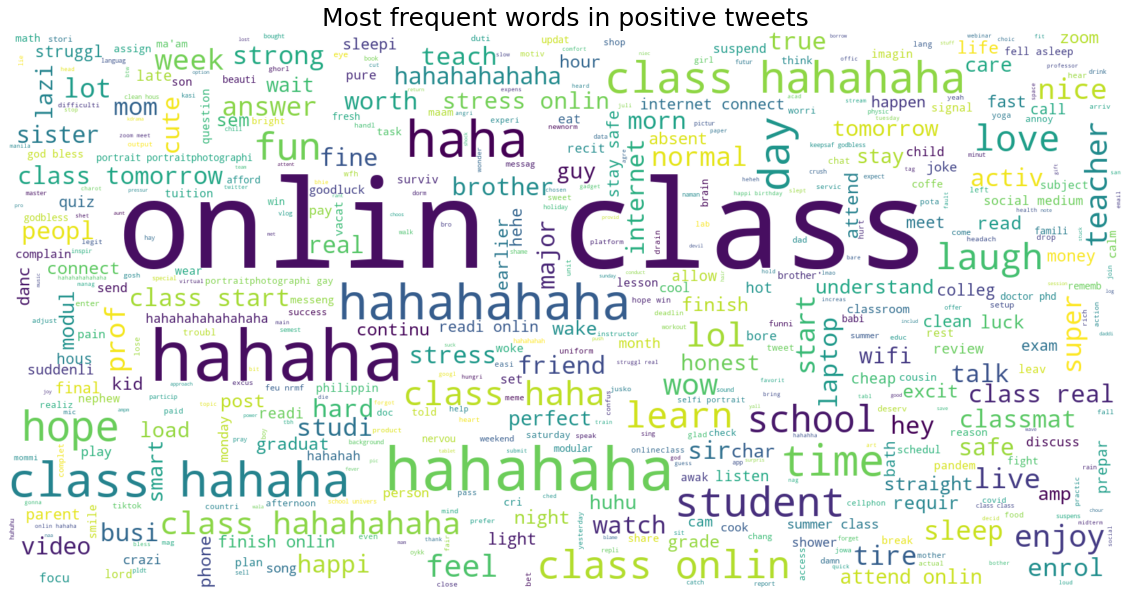

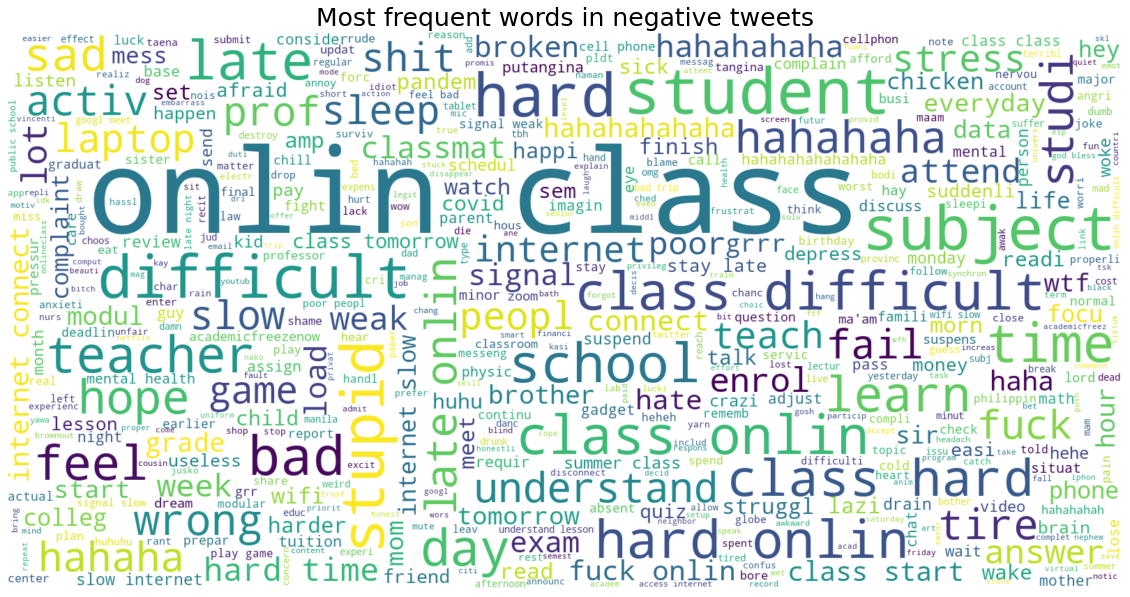

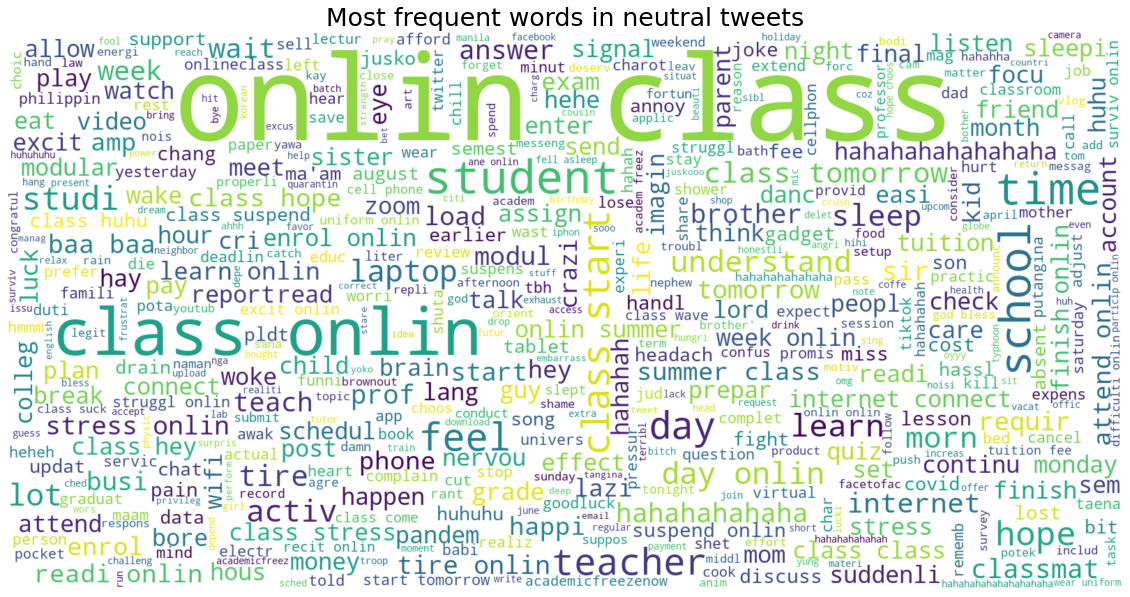

In [ ]:
word_cloud(pos_tweets, 'positive')
word_cloud(neg_tweets, 'negative')
word_cloud(neutral_tweets, 'neutral')

In [ ]:
def dist_freq_bargraph(data, sentiment):
    data = ' '.join([word for word in data['Processed Tweets']])
    Tweet_data = data.split()
    ## Creating FreqDist for whole BoW, keeping the 20 most common tokens
    all_fdist = FreqDist(Tweet_data).most_common(20)

    ## Conversion to Pandas series via Python Dictionary for easier plotting
    all_fdist = pd.Series(dict(all_fdist))

    ## Setting figure, ax into variables
    fig, ax = plt.subplots(figsize=(10,10))

    ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
    plt.title('Frequency Distribution of '+ sentiment +' tweets', fontsize=18)
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=30);

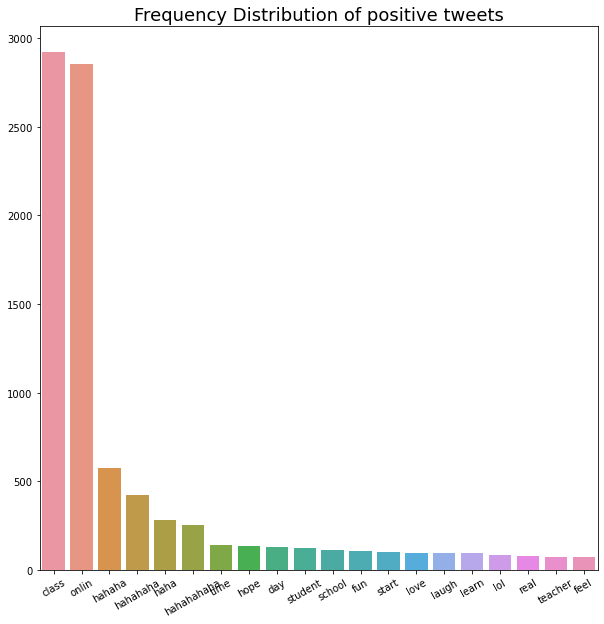

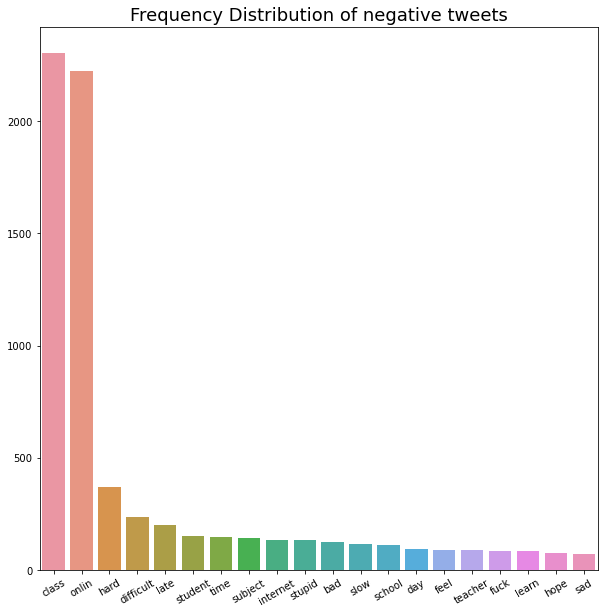

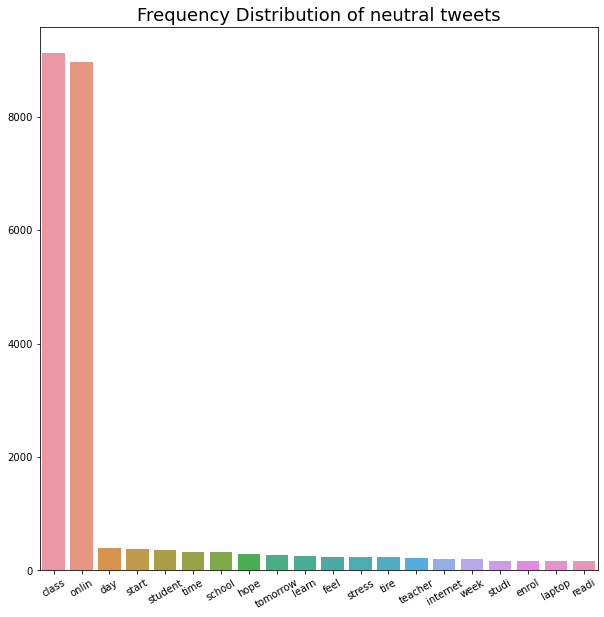

In [ ]:
dist_freq_bargraph(pos_tweets, 'positive')
dist_freq_bargraph(neg_tweets, 'negative')
dist_freq_bargraph(neutral_tweets, 'neutral')

### Train Data using Naive Bayes Algorithm

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_data['Processed Tweets'])

In [ ]:
X = text_data['Processed Tweets']
Y = text_data['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (10815, 54531)
Size of y_train: (10815,)
Size of x_test: (2704, 54531)
Size of y_test: (2704,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

Naive_model = MultinomialNB().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

predicted_naive = Naive_model.predict(x_test)
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: {:.2f}%".format(score_naive*100))
print(classification_report(y_test, predicted_naive))

Accuracy with Naive-bayes: 86.72%
              precision    recall  f1-score   support

    Negative       0.87      0.65      0.75       448
     Neutral       0.87      0.97      0.92      1685
    Positive       0.86      0.73      0.79       571

    accuracy                           0.87      2704
   macro avg       0.87      0.79      0.82      2704
weighted avg       0.87      0.87      0.86      2704



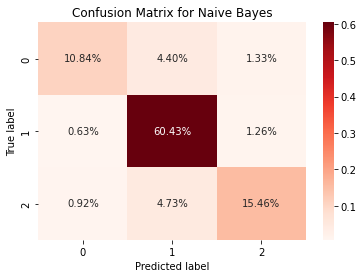

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat/np.sum(mat), annot=True, fmt='.2%', cbar=True,cmap=plt.cm.Reds)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()